<a href="https://colab.research.google.com/github/kayodeolusanya/Nexus-Bank-Customer-Segmentation-Project/blob/main/Nexus_Bank_Customer_Segmentation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries

# For Data Analysis
import pandas as pd
import numpy as np

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Data Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifier Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load dataset
df = pd.read_csv('/content/bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### Exploratory Data Analysis

In [3]:
df.shape

(45211, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
# Statistical Analysis of the data
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


<Axes: >

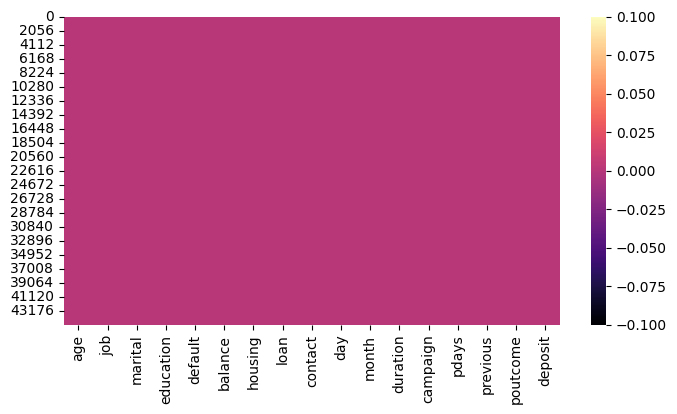

In [6]:
# Check for missing values
print(df.isnull().sum())

# Visualizing the missing data
plt.figure(figsize = (8,4))
sns.heatmap(df.isnull(), cbar= True, cmap= "magma")

In [7]:
# Checking for duplicated rows in the dataset
df.duplicated().sum()

0

#### Univariate Analysis

In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

Adult(<=50)      28926
Elderly(<=65)     8504
Youth(<=30)       7030
Aged(>65)          751
Name: age_bracket, dtype: int64


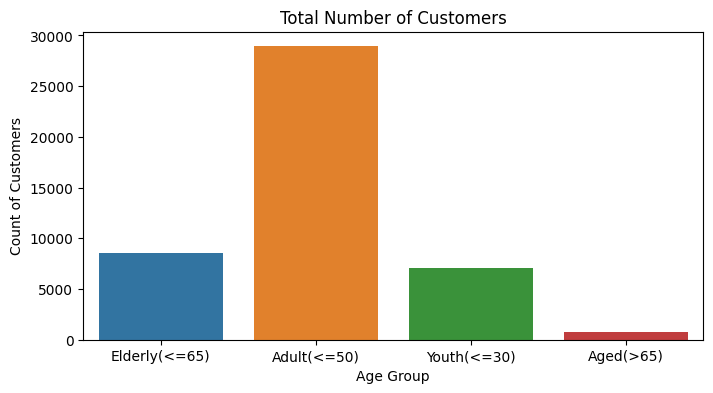

In [9]:
# Investigating the Age group of our customers

# Create an Age bracket column
def age_bracket(age):
  if age <= 30:
    return "Youth(<=30)"
  elif age <= 50:
    return "Adult(<=50)"
  elif age <= 65:
    return "Elderly(<=65)"
  else:
    return "Aged(>65)"

df['age_bracket'] = df['age'].apply(age_bracket)
plt.figure(figsize= (8,4))
sns.countplot(x='age_bracket', data=df)
plt.xlabel('Age Group')
plt.ylabel('Count of Customers')
plt.title('Total Number of Customers');
print(df['age_bracket'].value_counts())

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


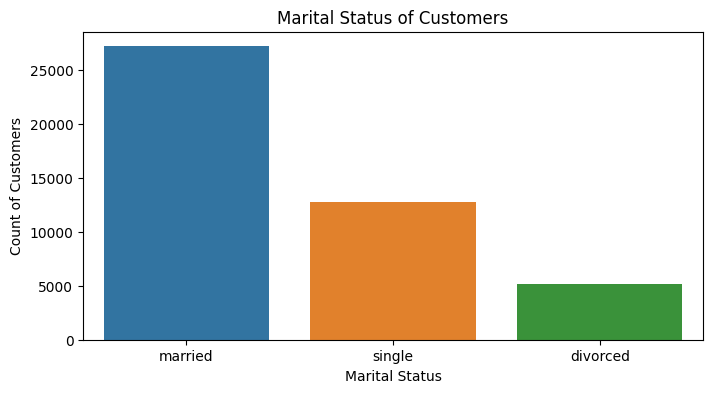

In [10]:
# Investigating the Marital Status of our customers
plt.figure(figsize= (8,4))
sns.countplot(x='marital', data=df)
plt.xlabel('Marital Status')
plt.ylabel('Count of Customers')
plt.title('Marital Status of Customers');
print(df['marital'].value_counts())

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


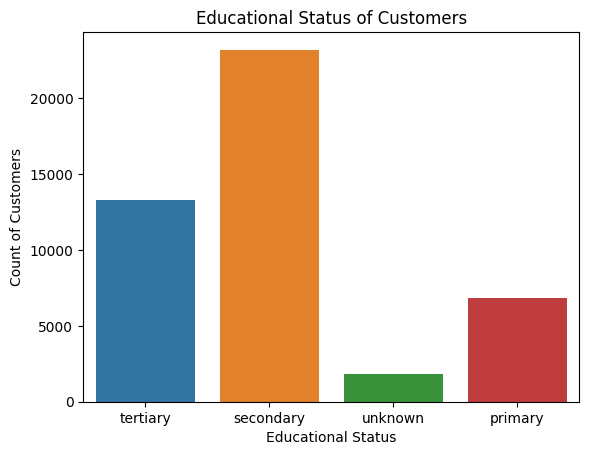

In [11]:
# Investigating the Educational Status of our customers
sns.countplot(x='education', data=df)
plt.xlabel('Educational Status')
plt.ylabel('Count of Customers')
plt.title('Educational Status of Customers');
print(df['education'].value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


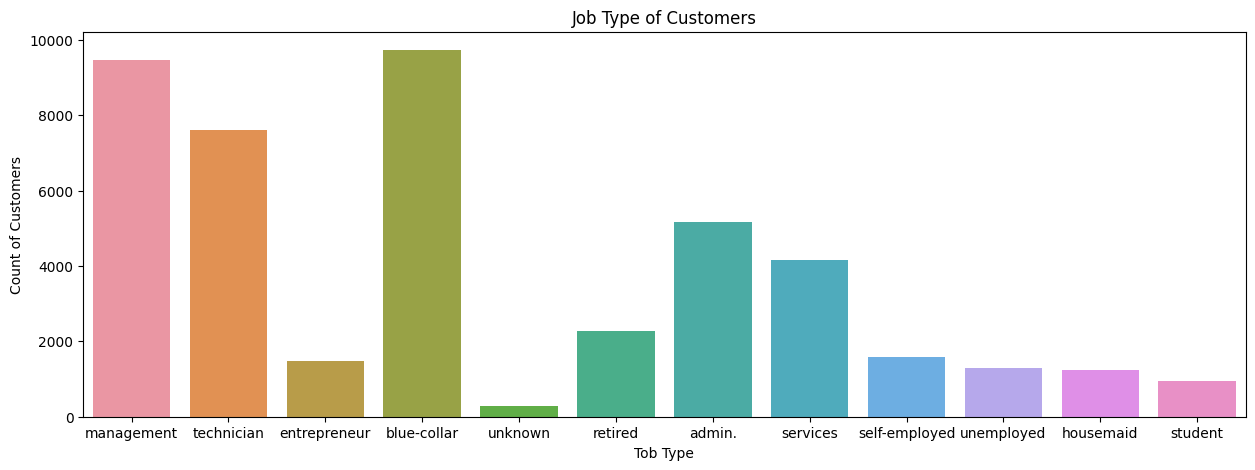

In [12]:
# Investigating the Job of our customers
plt.figure(figsize= (15,5))
sns.countplot(x='job', data=df)
plt.xlabel('Tob Type')
plt.ylabel('Count of Customers')
plt.title('Job Type of Customers');
print(df['job'].value_counts())

no     44396
yes      815
Name: default, dtype: int64


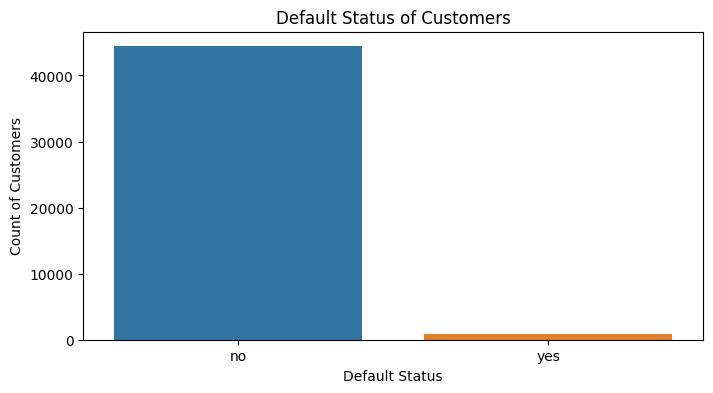

In [13]:
# Investigating the Default Status of our customers
plt.figure(figsize= (8,4))
sns.countplot(x='default', data=df)
plt.xlabel('Default Status')
plt.ylabel('Count of Customers')
plt.title('Default Status of Customers');
print(df['default'].value_counts())

no     39922
yes     5289
Name: deposit, dtype: int64


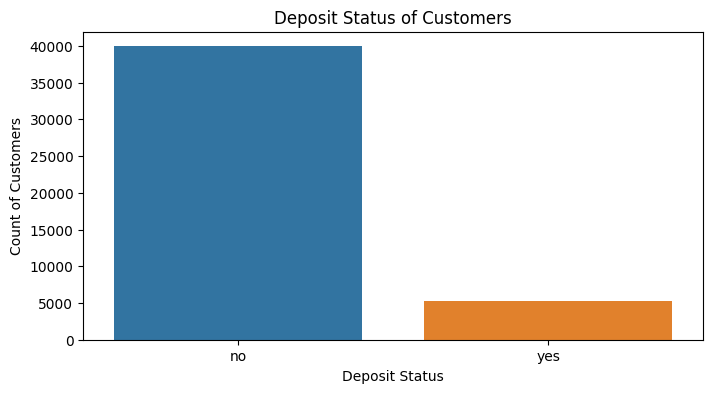

In [14]:
# Investigating the Deposit Status of our customers
plt.figure(figsize= (8,4))
sns.countplot(x='deposit', data=df)
plt.xlabel('Deposit Status')
plt.ylabel('Count of Customers')
plt.title('Deposit Status of Customers');
print(df['deposit'].value_counts())

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


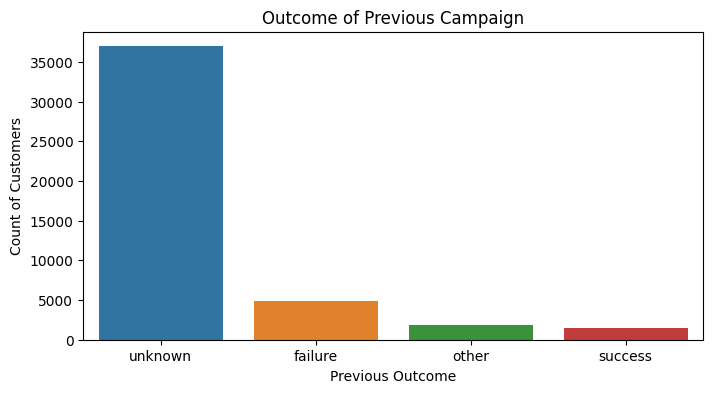

In [15]:
# Investigating the Previous Outcome of the last campaign.
plt.figure(figsize= (8,4))
sns.countplot(x='poutcome', data=df)
plt.xlabel('Previous Outcome')
plt.ylabel('Count of Customers')
plt.title('Outcome of Previous Campaign');
print(df['poutcome'].value_counts())

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64


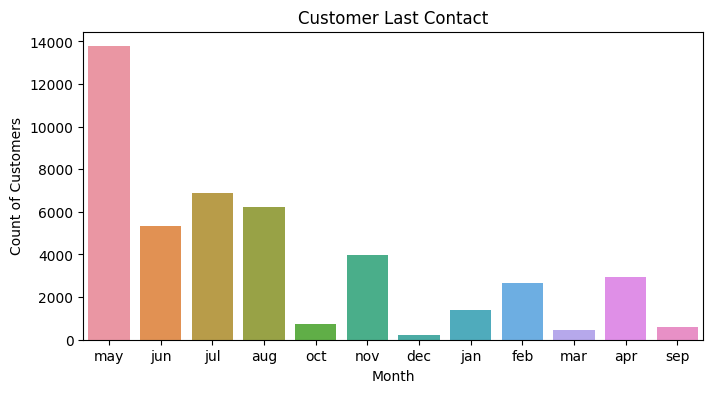

In [16]:
# Investigating the Last Month our customer was contacted
plt.figure(figsize= (8,4))
sns.countplot(x='month', data=df)
plt.xlabel('Month')
plt.ylabel('Count of Customers')
plt.title('Customer Last Contact');
print(df['month'].value_counts())

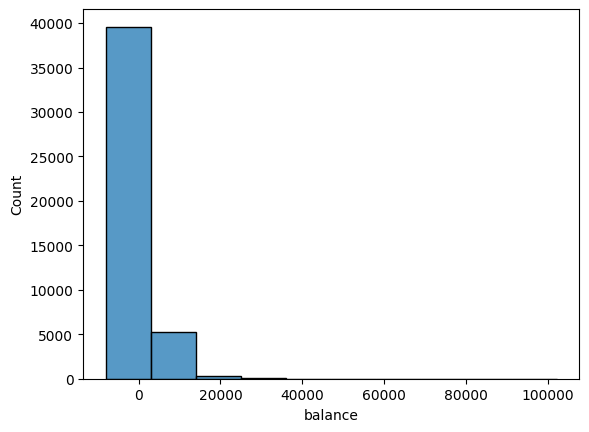

In [17]:
# Investigating the Balances of our customers
sns.histplot(x=df["balance"], bins=10);

#### Multivariate Analysis

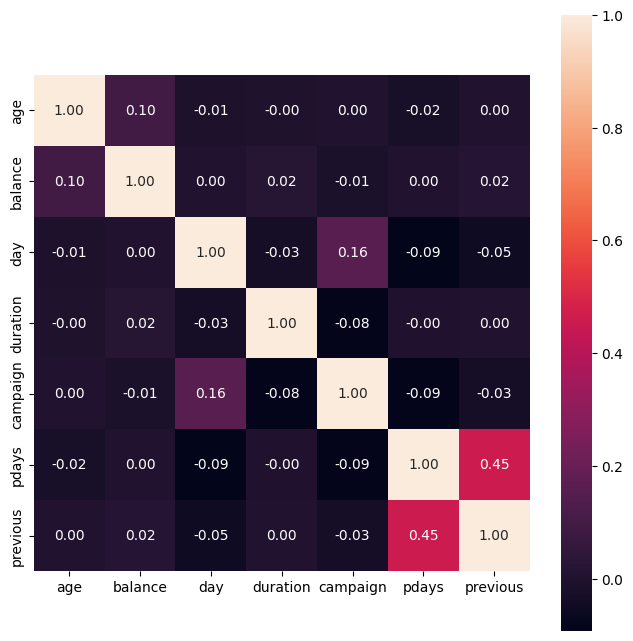

In [18]:
#  Correlation between variables in the dataset
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10});

In [19]:
ml_df = df
ml_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_bracket
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Elderly(<=65)
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Adult(<=50)
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Adult(<=50)
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Adult(<=50)
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Adult(<=50)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,Elderly(<=65)
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,Aged(>65)
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,Aged(>65)
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,Elderly(<=65)


#### Feature Engineering

In [20]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
encoder = LabelEncoder() #method initialization

#Looping for columns except Survived
for c in df.columns[1:]:
  if(df[c].dtype=='object'):
    df[c] = encoder.fit_transform(df[c])
  else:
    df[c] = df[c]

ml_df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_bracket
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0,2
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0,0


In [22]:
# Normalizing the data
scaler = MinMaxScaler()

ml_df['scaled_balance'] = scaler.fit_transform(ml_df['balance'].values.reshape(-1,1))
ml_df["Scaled_duration"] = scaler.fit_transform(ml_df['duration'].values.reshape(-1,1))
ml_df["Scaled_pdays"] = scaler.fit_transform(ml_df['pdays'].values.reshape(-1,1))

#Dropping features we dont need
ml_df.drop('balance', axis=1, inplace=True)
ml_df.drop('duration', axis=1, inplace=True)
ml_df.drop('pdays', axis=1, inplace=True)
ml_df.drop('age_bracket', axis=1, inplace=True)
ml_df.drop('contact', axis=1, inplace=True)
ml_df
     

,age,job,marital,education,default,housing,loan,day,month,campaign,previous,poutcome,deposit,scaled_balance,Scaled_duration,Scaled_pdays
0,58,4,1,2,0,1,0,5,8,1,0,3,0,0.092259,0.053070,0.000000
1,44,9,2,1,0,1,0,5,8,1,0,3,0,0.073067,0.030704,0.000000
2,33,2,1,1,0,1,1,5,8,1,0,3,0,0.072822,0.015453,0.000000
3,47,1,1,3,0,1,0,5,8,1,0,3,0,0.086476,0.018707,0.000000
4,33,11,2,3,0,0,0,5,8,1,0,3,0,0.072812,0.040260,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,0,0,17,9,3,0,3,1,0.080293,0.198658,0.000000
45207,71,5,0,0,0,0,0,17,9,2,0,3,1,0.088501,0.092721,0.000000
45208,72,5,1,1,0,0,0,17,9,5,3,2,1,0.124689,0.229158,0.212156
45209,57,1,1,1,0,0,0,17,9,4,0,3,0,0.078868,0.103294,0.000000


###Dimensionality Reduction

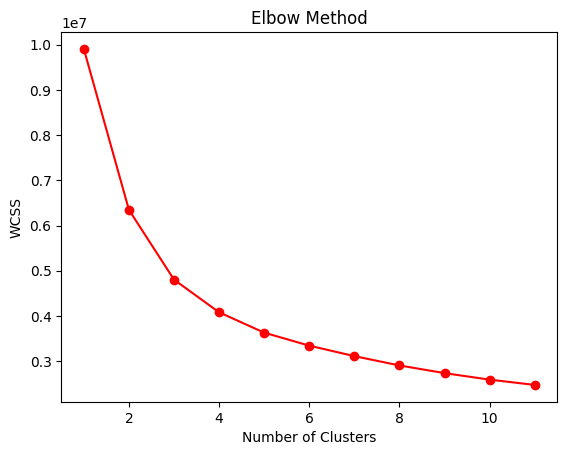

In [23]:
# Determining the numbers of clusters using the Elbow Method
wcss = []
for i in range(1,12):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(ml_df)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,12), wcss, color='red', marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

From the plotted graph, 3 clusters is the optimal number of clusters.

###Model Building using KMeans

In [37]:
# Fit K-means clustering model
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(ml_df)

# Add cluster labels to data 
ml_df['Cluster'] = kmeans.labels_
ml_df

,age,job,marital,education,default,housing,loan,day,month,campaign,previous,poutcome,deposit,scaled_balance,Scaled_duration,Scaled_pdays,Cluster
0,58,4,1,2,0,1,0,5,8,1,0,3,0,0.092259,0.053070,0.000000,0
1,44,9,2,1,0,1,0,5,8,1,0,3,0,0.073067,0.030704,0.000000,1
2,33,2,1,1,0,1,1,5,8,1,0,3,0,0.072822,0.015453,0.000000,1
3,47,1,1,3,0,1,0,5,8,1,0,3,0,0.086476,0.018707,0.000000,1
4,33,11,2,3,0,0,0,5,8,1,0,3,0,0.072812,0.040260,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,0,0,17,9,3,0,3,1,0.080293,0.198658,0.000000,0
45207,71,5,0,0,0,0,0,17,9,2,0,3,1,0.088501,0.092721,0.000000,0
45208,72,5,1,1,0,0,0,17,9,5,3,2,1,0.124689,0.229158,0.212156,0
45209,57,1,1,1,0,0,0,17,9,4,0,3,0,0.078868,0.103294,0.000000,0


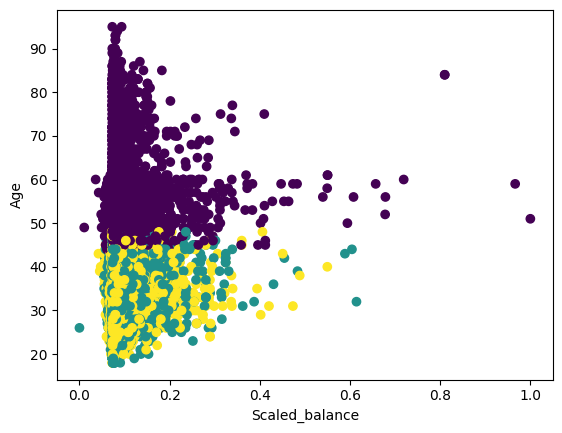

0.2946928903224255

In [43]:
# Visualizing the results
plt.scatter(x=ml_df['scaled_balance'], y=ml_df['age'], c=ml_df['Cluster'], label='Centroids')
plt.xlabel('Scaled_balance')
plt.ylabel('Age')
plt.show()

# Calculate silhouette score
from sklearn.metrics import silhouette_score

silhouette_score(df, kmeans.labels_)

2    15971
1    14969
0    14271
Name: Cluster, dtype: int64


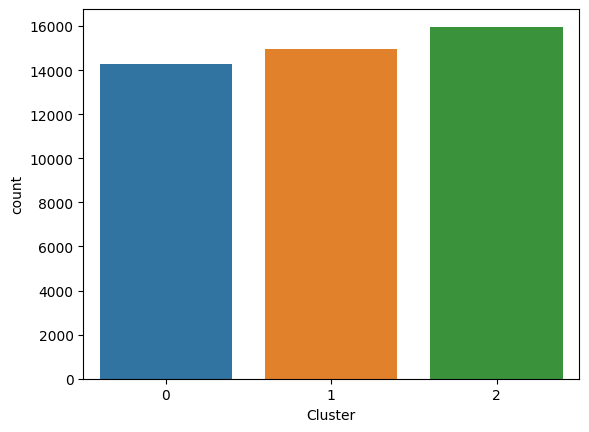

In [45]:
#   Visualizing the ´Customer count for each cluster
sns.countplot(x='Cluster', data=ml_df)
print(df['Cluster'].value_counts())